# COMP47590 Advanced Machine Learning
# CNN with Pytorch

INSTALL PYTORCH

Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. This should be suitable for many users. Please ensure that you have <span style="color:red">**met the prerequisites below (e.g., numpy)**</span>, depending on your package manager. Anaconda is our recommended package manager since it installs all dependencies.

<img src="PYTORCH_command.jpg"  width="60%" height="60%">

Import packages that will be used in this demo.

In [3]:
import numpy as np   # to handle matrix and data operation
import pandas as pd  # to read csv and handle dataframe
np.random.seed(1337) # for reproducibility
pd.set_option('display.max_columns', None) # to display all columns

import matplotlib.pyplot as plt
%matplotlib inline


import os
import random
import scipy as sp
import PIL
# allows to share your machine learning model with others is to create an interactive app
# allows your users or colleagues to try out the demo in their browsers.
# import gradio

# import cv2

from IPython.display import display, HTML, Image
from IPython.display import SVG

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math
print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.5.1


## Dataset Pre-Processing

Read in the mnist dataset and prepare it for learning. This noramlises the values to between 0 and 1, and divides the data into Train, Validation and Test sets.

In [2]:
# # Use the following cells if you are working on google colab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# import sys
# sys.path.append('/content/drive/MyDrive/COMP47590_Labs/')


# file_name = "/content/drive/MyDrive/COMP47590_Labs/mnist_train.csv"
# target_feature = "label"


In [4]:
file_name = "../Data/mnist_train.csv"
target_feature = "label"

In [5]:
# Load the dataset
abt = pd.read_csv(file_name, encoding="ISO-8859-1")
# abt = pd.read_csv('../Data/mnist_train.csv', encoding="ISO-8859-1")
print('The original size of abt:', abt.shape)

# Make a random sample from the full dataset
sample_rate = 0.3
abt = abt.sample(frac=sample_rate)
print('The sampled size of abt', abt.shape)

abt.head()

The original size of abt: (60000, 785)
The sampled size of abt (18000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,

In [6]:
# Put all but the target variable into the descriptive features array
X = abt.iloc[:, 1:]
Y = abt['label']

# Use a range scaling to scale all variables to between -1 and 1
X = X/255
X = (X)*2 - 1

X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,

In [7]:
# Perfrom split to train, validation, test
x_train_plus_valid, x_test, y_train_plus_valid, y_test = train_test_split(X, Y, random_state=0, 
                                                                          test_size=0.30, train_size=0.7, 
                                                                          stratify = Y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_plus_valid, y_train_plus_valid, random_state=0, 
                                                      test_size=0.30, train_size=0.7, 
                                                      stratify = y_train_plus_valid)

# convert to numpy arrays
x_train = x_train.values
x_valid = x_valid.values
x_test = x_test.values

# Copy the dataframes for plotting later
x_train_cat = x_train.copy()
x_valid_cat = x_valid.copy()
x_test_cat = x_test.copy()

y_train_cat = y_train.copy()
y_valid_cat = y_valid.copy()
y_test_cat = y_test.copy()

# convert to numpy arrays
y_train = y_train.values
y_valid = y_valid.values
y_test = y_test.values

Print some images from the training set

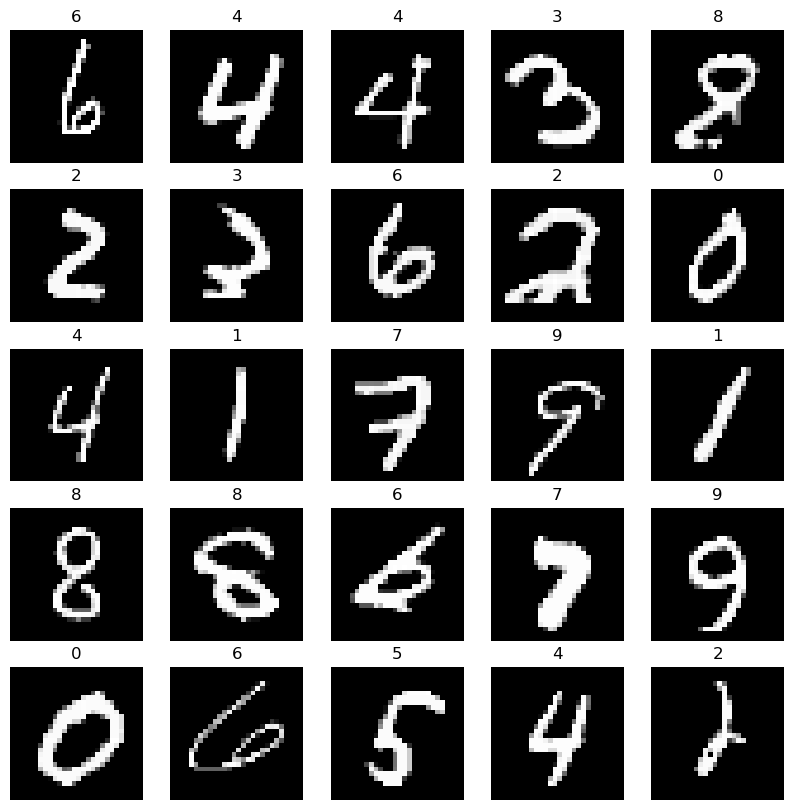

In [10]:
pltsize=2
row_images = 5
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, x_train.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow((x_train_cat[i_rand]*255).astype('int').reshape(28,28), cmap='gray', vmin=0, vmax=255)
    plt.title((str(y_train_cat.iloc[i_rand])))
    # print('Training sample',i_rand,': class:',y_train[i_rand])
plt.show()

Prepare the data for input to a convolutional network

In [11]:
# input image dimensions
img_rows, img_cols = 28, 28

# Convert the features and labels to PyTorch tensors
x_train = torch.tensor(x_train).float()
x_valid = torch.tensor(x_valid).float()
x_test = torch.tensor(x_test).float()

# Reshape the features from (n, 784) to (n, 1, 28, 28)
x_train = x_train.reshape(-1, 1, img_rows, img_cols)
x_valid = x_valid.reshape(-1, 1, img_rows, img_cols)
x_test = x_test.reshape(-1, 1, img_rows, img_cols)

# Print the shape of x_train, x_valid, x_test
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'valid samples')
print(x_test.shape[0], 'test samples')

x_train shape: torch.Size([8820, 1, 28, 28])
8820 train samples
3780 valid samples
5400 test samples


In [12]:
num_classes = 10

y_train = torch.tensor(y_train).long()
y_valid = torch.tensor(y_valid).long()
y_test = torch.tensor(y_test).long()

# Print the shape of y_train, y_valid, y_test
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)
print('y_test shape:', y_test.shape)

y_train shape: torch.Size([8820])
y_valid shape: torch.Size([3780])
y_test shape: torch.Size([5400])


## Model Building

Set up the convolutional neural network.

In [13]:
class CNN(nn.Module):

    # Defining the Constructor
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()

        # In the init function, we define the layers will be used in our model

        # 32 filters applied in the first convolutional layer with a kernel size of 3
        self.conv1 = nn.Conv2d(in_channels=1, 
                               out_channels=32, 
                               kernel_size=3, stride=1, padding=1)

        # Apply max pooling with a kernel size of 2
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        # The second convolutional layer takes 32 input channels, and generates 64 outputs
        self.conv2 = nn.Conv2d(in_channels=32, 
                               out_channels=64, 
                               kernel_size=3, 
                               stride=1, padding=1)

        # Apply max pooling with a kernel size of 2
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        # Our 28x28 image tensors will be pooled twice with a kernel size of 2. therefore, 28/2/2 is 7.
        # This means that the output of the second convolutional layer will be 64x7x7.

        # We need to flatten these in order to feed them to a fully-connected layer
        self.fc1 = nn.Linear(in_features=64 * 7 * 7, out_features=128)

        self.fc2 = nn.Linear(in_features=128, out_features=num_classes)

    def forward(self, x):
        # In the forward function, pass the data through the layers we defined in the init function

        # Use a ReLU activation function after convolution layer 1 and pooling layer 1
        x = self.conv1(x)
        x = self.pool1(x)
        x = F.relu(x)

        # We do the same for convolution layer 2 and pooling layer 2 (we can write this in one line)
        x = F.relu(self.pool2(self.conv2(x)))

        # Flatten the output of the second convolutional layer
        x = x.view(-1, 64 * 7 * 7)
        # Feed to fully-connected layer to predict class
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #x = F.softmax(x, dim=1)
        return x

# Create an instance of the model class and allocate it to the device
model = CNN(num_classes=num_classes)

print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


Train the model

In [15]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_AP

ValueError: API key must be 40 characters long, yours was 4

In [16]:
# wandb logging
wandb.init(
    project="CNN-MNIST",
    name = "CNN_Lab4",
        config={
            "epochs": 25,
            "batch_size": 256,
            "lr": 1e-3
            })

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.


ValueError: API key must be 40 characters long, yours was 3

In [17]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=wandb.config.lr)

# # Set the number of epochs to train for
# epochs = 20
# batch_size =256
# Calcualte the number of min batches per epoch
n_steps_per_epoch = math.ceil(len(x_train) / wandb.config.batch_size)

# Define lists to store the training and validation loss and accuracy for each epoch
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Start training
for epoch in range(wandb.config.epochs):
    # Set the model to train mode
    model.train()

    # Initialize the training loss and accuracy for this epoch
    running_loss = 0.0
    running_corrects = 0
    training_step = 0
    # Iterate over the training set in batches
    for i in range(0, x_train.shape[0], wandb.config.batch_size):
        # Get a batch of features and targets from the training set
        batch_features = x_train[i:i+wandb.config.batch_size]
        batch_targets = y_train[i:i+wandb.config.batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute statistics
        running_loss += loss.item() * wandb.config.batch_size
        running_corrects += torch.sum(torch.argmax(outputs, dim=1) == batch_targets)
        metrics = {"train/train_loss": loss,
                   "train/epoch": (training_step + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                   }

        # At every step during training log metrics with weights and biases
        if training_step + 1 < n_steps_per_epoch:
            wandb.log(metrics)

        training_step = training_step + 1

    # Compute statistics for the entire epoch
    epoch_loss = running_loss / len(x_train)
    epoch_acc = running_corrects.item() / len(x_train) * 100

    metrics["train/train_acc"] =  epoch_acc

    # Append the training statistics to the lists
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # Evaluation on validation set
    with torch.no_grad():
        val_outputs = model(x_valid)
        val_loss = criterion(val_outputs, y_valid)
        val_corrects = torch.sum(torch.argmax(val_outputs, dim=1) == y_valid)
        val_acc = val_corrects.item() / len(x_valid) * 100

    # Log train and validation metrics to wandb
    val_metrics = {"val/val_loss": val_loss,
                   "val/val_accuracy": val_acc}

    wandb.log({**metrics, **val_metrics})
    # Append the validation statistics to the lists
    val_losses.append(val_loss.item())
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}/{wandb.config.epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_acc:.2f}%')


Error: You must call wandb.init() before wandb.config.lr

In [14]:
batch_targets.shape

torch.Size([116])

Plot accuracy and loss over the training period for training and validation sets.

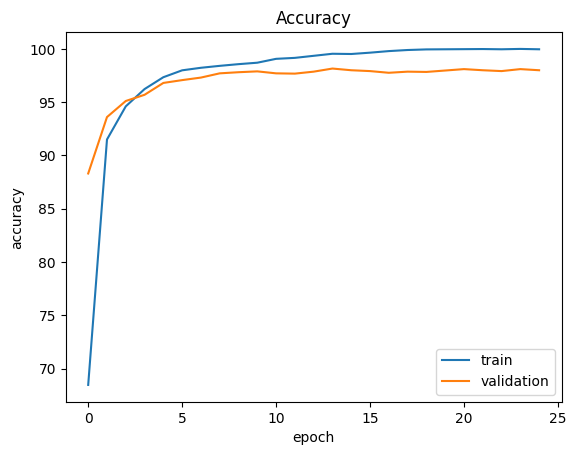

In [15]:
# Summarize history for accuracy
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
#plt.ylim((0, 1.1))
plt.show()

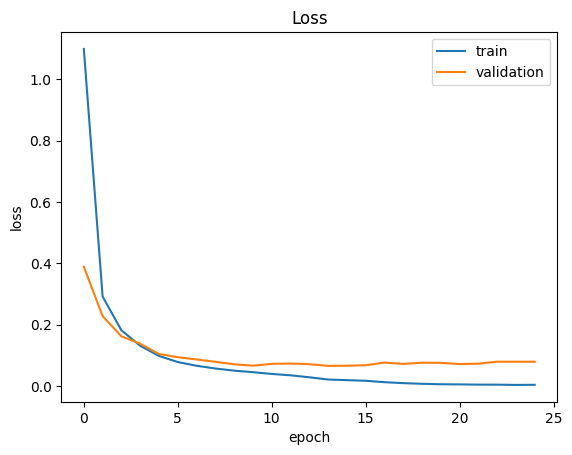

In [16]:
# Summarize history for loss
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
# Evaluate the model on the test set
model.eval()
test_outputs = model(x_test)
test_loss = criterion(test_outputs, y_test)
test_corrects = torch.sum(torch.argmax(test_outputs, dim=1) == y_test)
test_acc = test_corrects.item() / len(x_test) * 100

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')
wandb.summary['test_accuracy'] = test_acc

Test Loss: 0.0793, Test Accuracy: 98.00%


## Model Evaluation

Evaluate the model

In [18]:
from sklearn import metrics
print("****** Test Data ********")

# Make a set of predictions for the test data
y_pred = model(x_test)
y_pred = torch.argmax(y_pred, dim=1).numpy()

# Print performance details
print(metrics.classification_report(y_test_cat, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test_cat, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

****** Test Data ********
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       547
           1       0.99      0.99      0.99       608
           2       0.98      0.98      0.98       547
           3       0.98      0.98      0.98       548
           4       0.98      0.98      0.98       531
           5       0.97      0.99      0.98       469
           6       0.99      0.98      0.98       528
           7       0.98      0.98      0.98       573
           8       0.96      0.97      0.96       520
           9       0.98      0.97      0.97       529

    accuracy                           0.98      5400
   macro avg       0.98      0.98      0.98      5400
weighted avg       0.98      0.98      0.98      5400

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,539,0,0,0,1,1,2,0,3,1,547
1,0,604,1,2,1,0,0,0,0,0,608
2,0,1,538,3,1,1,1,2,0,0,547
3,0,0,3,536,0,1,0,2,6,0,548
4,0,0,0,0,520,0,2,2,1,6,531
5,0,1,0,1,0,462,0,0,4,1,469
6,2,3,0,0,1,4,516,0,2,0,528
7,0,1,4,1,4,0,0,561,1,1,573
8,0,3,3,1,0,5,2,0,504,2,520


Plot some of the examples that the model classified correctly.

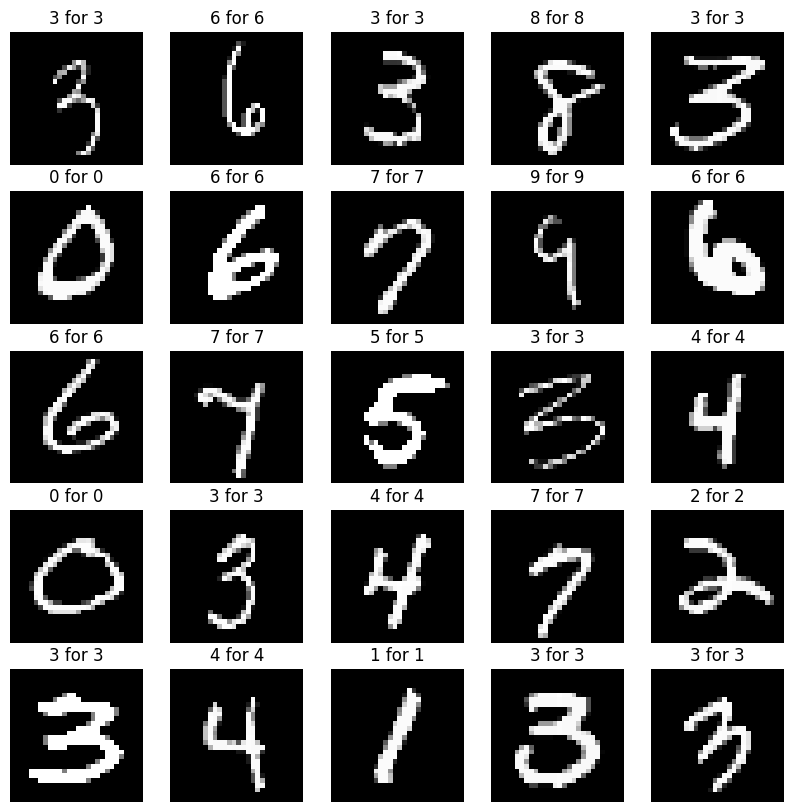

In [19]:
pltsize=2
row_images = 5
col_images = 5

maxtoshow = row_images * col_images
predictions = y_pred.reshape(-1)
corrects = predictions == y_test_cat
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(x_test.shape[0]):
    if ii>=maxtoshow:
        break
    if corrects.iloc[i]:
        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow((x_test_cat[i]*255).astype('int').reshape(28,28), cmap='gray', vmin=0, vmax=255)
        plt.title("{} for {}".format(predictions[i], y_test_cat.iloc[i]))
        ii = ii + 1

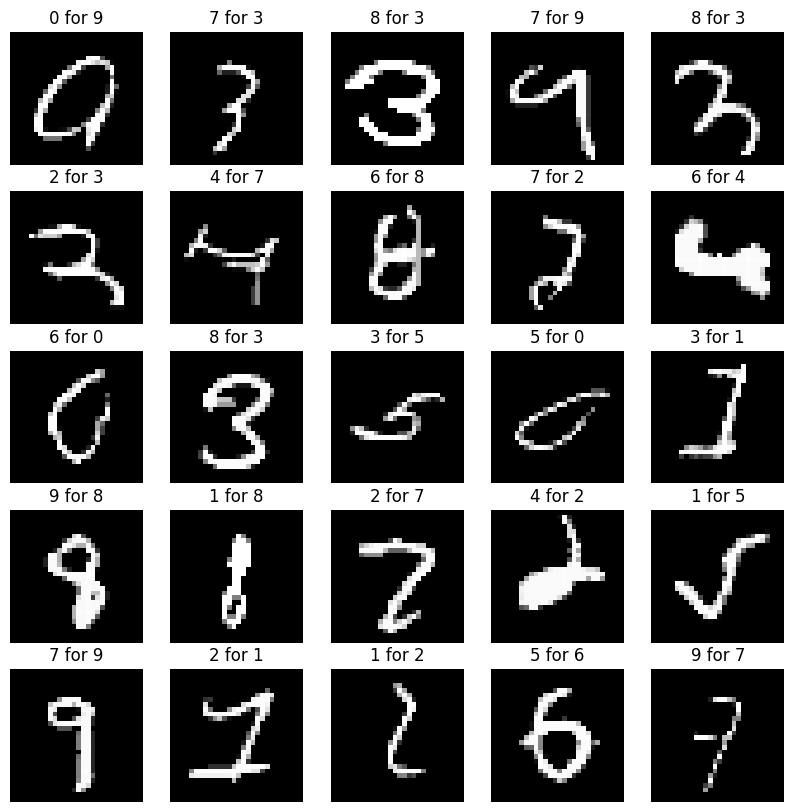

In [20]:
pltsize=2
row_images = 5
col_images = 5

maxtoshow = row_images * col_images
predictions = y_pred.reshape(-1)
errors = predictions != y_test_cat
ii = 0
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(x_test.shape[0]):
    if ii>=maxtoshow:
        break
    if errors.iloc[i]:
        plt.subplot(row_images,col_images, ii+1)
        plt.axis('off')
        plt.imshow((x_test_cat[i]*255).astype('int').reshape(28,28), cmap='gray', vmin=0, vmax=255)
        plt.title("{} for {}".format(predictions[i], y_test_cat.iloc[i]))
        ii = ii + 1

In [21]:
wandb.finish()

train/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/train_acc,▁▆▇▇▇████████████████████
train/train_loss,█▃▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▅▆▆▇▇▇██████████████████
val/val_loss,█▅▃▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,98.0
train/epoch,25.0
train/train_acc,99.95465
train/train_loss,0.00069
val/val_accuracy,97.98942
val/val_loss,0.07866
